# 1. Introduction to Pytorch

## 1.1 The three core components of PyTorch

**3 Main Components**
- 1. PyTorch is a ***tensor library*** that extends the concept of the array-oriented programming library NumPy with the additional feature that accelerates computation on GPUs, thus providing a seamless switch between CPUs and GPUs.
  2. PyTorch is an ***automatic differentiation engine***, also known as autograd, that enables the automatic computation of gradients for tensor operations, simplifying backpropagation and model optimization.
  3. PyTorch is a ***deep learning library***. It offers modular, flexible, and efficient building blocks, including pretrained models, loss functions, and optimizers, for designing and training a wide range of deep learning models, catering to both researchers and developers.


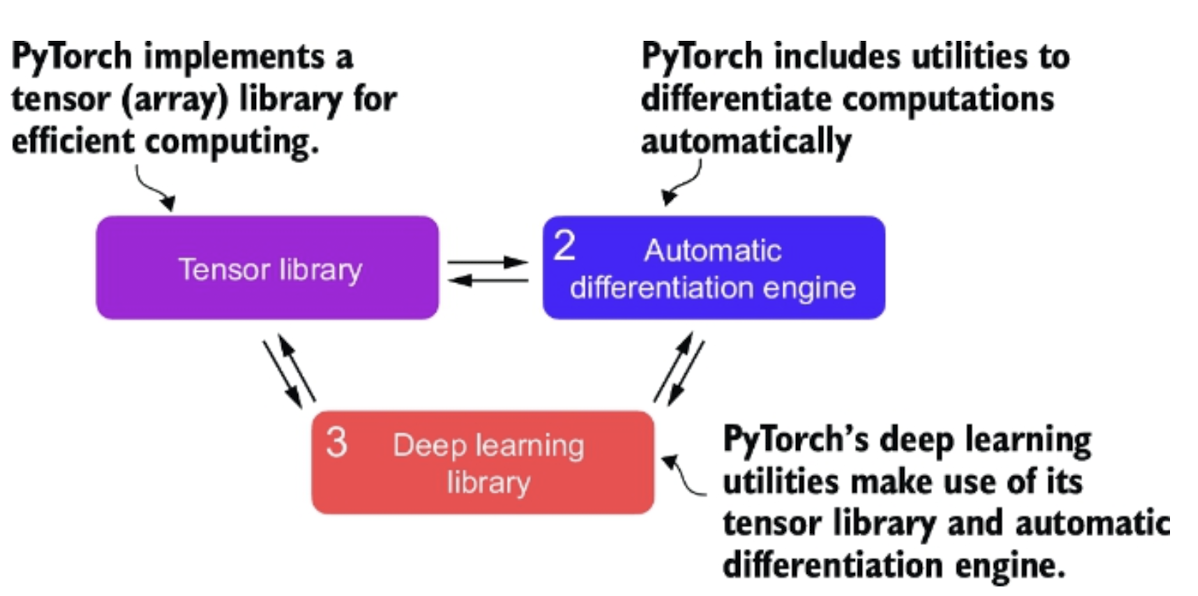
PyTorch’s three main components include a tensor library as a fundamental building block for computing, automatic differentiation for model optimization, and deep learning utility functions, making it easier to implement and train deep neural network models.

## 1.2 Deep Learning
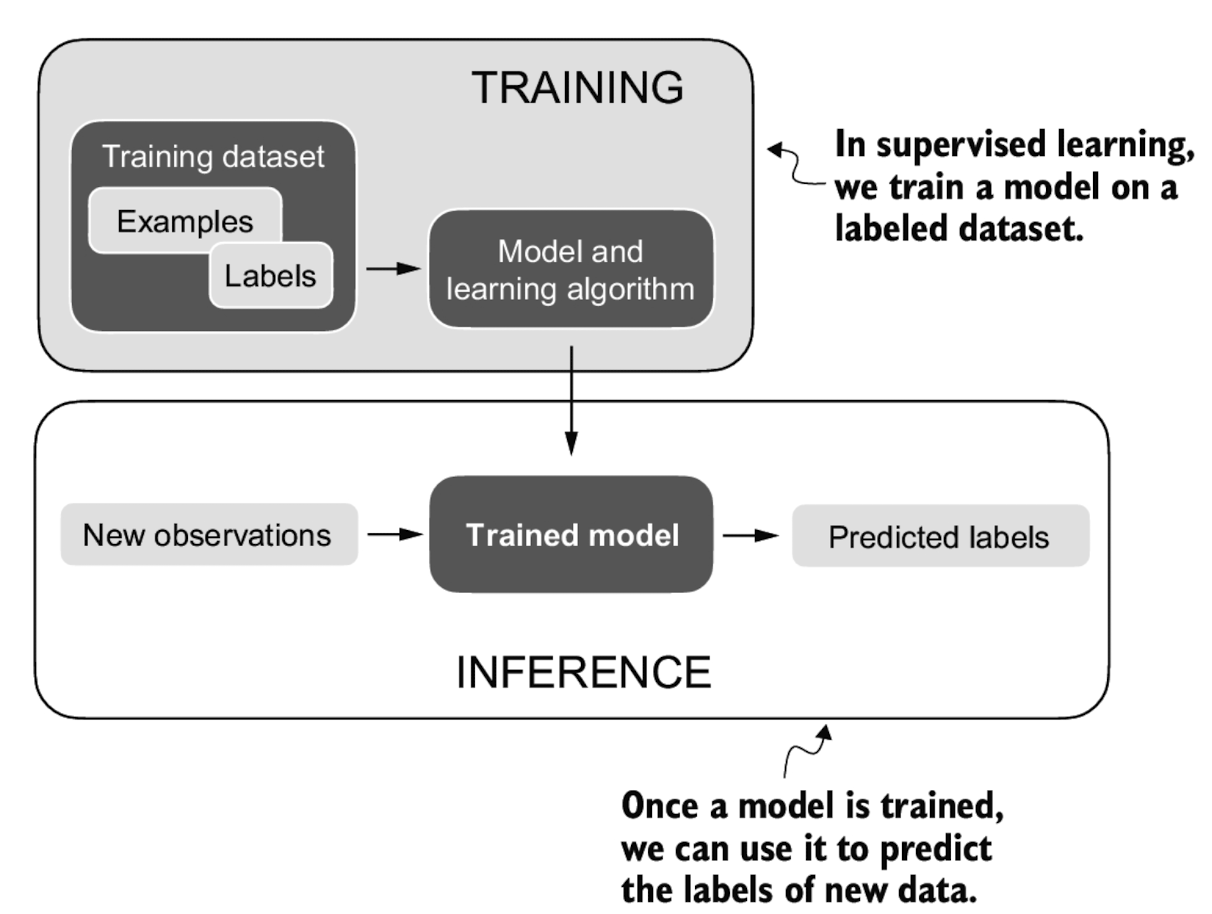

In [1]:
## version check
import torch
torch.__version__

'2.7.0'

In [2]:
# checking weather torch is recognised by the GPU present in the sytem
import torch
torch.cuda.is_available() # as this sytem cuda is not available so not recognised

False

- --> Pytorch on Apple silicon Chip --> M1, M2, M3 chips

In [3]:
print(torch.backends.mps.is_available()) # Yes M1 support the pytorch accelerated computations

True


# 2. Understanding the Tensors

Tensors represent a mathematical concept that generalizes vectors and matrices to potentially higher dimensions. In other words, tensors are mathematical objects that can be characterized by their order (or rank), which provides the number of dimensions. For example, a scalar (just a number) is a tensor of rank 0, a vector is a tensor of rank 1, and a matrix is a tensor of rank 2. <br>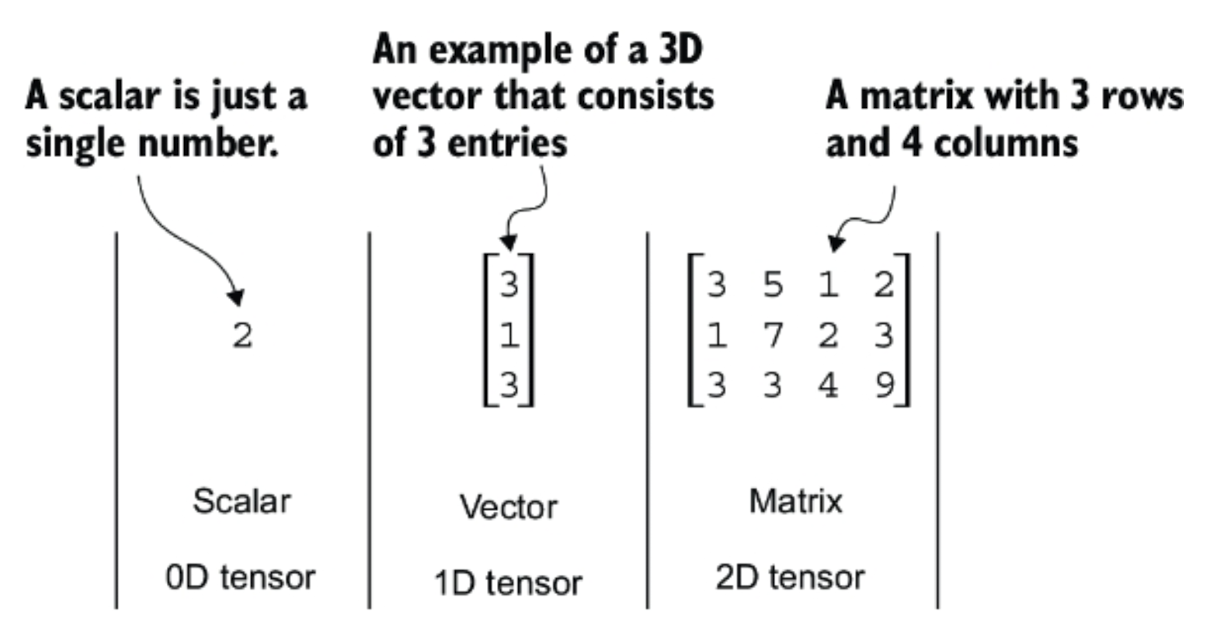

* From a computational perspective, tensors serve as ***data containers***. For instance, they hold multidimensional data, where ***each dimension represents a different feature***. Tensor libraries like PyTorch can create, manipulate, and compute with these arrays efficiently. In this context, a tensor library functions as an array library.<br>
* PyTorch tensors are similar to **NumPy arrays** but have several additional features that are important for deep learning. For example, PyTorch adds an **automatic differentiation engine**, simplifying computing gradients.
* PyTorch tensors also support **GPU computations** to speed up deep neural network training.


## 2.1 Scalars, vectors, matrices, and tensors


* PyTorch tensors are data containers for array-like structures.
* A scalar is a zero-dimensional tensor (for instance, just a number).
* a vector is a one-dimensional tensor,
* and a matrix is a two-dimensional tensor.
* There is no specific term for higher-dimensional tensors, so we typically refer to a three-dimensional tensor as just a 3D tensor, and so forth.
* We can create objects of PyTorch’s Tensor class using the torch.tensor function.

In [5]:
import torch
tensor0d = torch.tensor(1) # 1. Creates a zero-dimensional tensor (scalar) from a Python integer
tensor1d = torch.tensor([1,2,3]) # 2. Creates a one-dimensional tensor (vector) from a Python list
tensor2d = torch.tensor([[1,2],[3,4]]) # 3. Creates a two-dimensional tensor from a nested Python list
tensor3d = torch.tensor([[[1,2],[3,4]],[[5,6],[6,7]]]) # 4. Creates a three-dimensional tensor from a nested Python list
print(tensor3d)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [6, 7]]])


## 2.2 Tensor Data Type

* PyTorch adopts the default ***64-bit integer data type*** from Python.
* We can access the data type of a tensor via the .dtype attribute of a tensor:

In [6]:
tensor1d = torch.tensor([1,2,3])
print(tensor1d.dtype)

torch.int64


* If we create tensors from Python floats, PyTorch creates tensors with a ***32-bit precision*** by default:


In [7]:
floatvec = torch.tensor([1.0,2.0,3.0])
print(floatvec.dtype)

torch.float32


* This choice is primarily due to the balance between precision and computational efficiency.
* A 32-bit floating-point number offers sufficient precision for most deep learning tasks while consuming less memory and computational resources than a 64-bit floating-point number. Moreover, GPU architectures are optimized for 32-bit computations, and using this data type can significantly speed up model training and inference.

* It is possible to change the precision using a tensor’s .to method.


In [8]:
floatvec = tensor1d.to(torch.float32)
print(floatvec.dtype)

torch.float32


## 2.3 Common PyTorch tensor operations

In [1]:
import torch
tensor2d = torch.tensor([[1,2,3],
                         [4,5,6]])
print(tensor2d)

tensor([[1, 2, 3],
        [4, 5, 6]])


* The .shape attribute allows us to access the shape of a tensor:


In [2]:
print(tensor2d.shape)

torch.Size([2, 3])


As the .shape returns : ([2,3]) meaning 2 rows and 3 columns. To reshape the tensor into a 3 × 2 tensor, we can use the .reshape method:

In [3]:
print(tensor2d.reshape(3,2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


However, note that the more common command for reshaping tensors in PyTorch is .view():

In [4]:
print(tensor2d.view(3,2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


* (The subtle difference between .view() and .reshape() in PyTorch lies in their handling of memory layout: .view() requires the original data to be contiguous and will fail if it isn’t, whereas .reshape() will work regardless, copying the data if necessary to ensure the desired shape.)

- Next, we can use .T to transpose a tensor, which means flipping it across its diagonal. Note that this is not the same as reshaping a tensor, as you can see based on the following result:


In [6]:
print(tensor2d.T) # rows becomes columns and columns becomes rows

tensor([[1, 4],
        [2, 5],
        [3, 6]])


- The common way to multiply two matrices in PyTorch is the .matmul method:

In [7]:
print(tensor2d.matmul(tensor2d.T))

tensor([[14, 32],
        [32, 77]])


- However, we can also adopt the @ operator, which accomplishes the same thing more compactly:

In [8]:
print(tensor2d @ tensor2d.T)

tensor([[14, 32],
        [32, 77]])


# 3. Seeing models as computation graphs

* Now let’s look at PyTorch’s ***automatic differentiation engine***, also known as ***autograd***. PyTorch’s autograd system provides functions to compute gradients in dynamic computational graphs automatically.


Let’s look at a concrete example to illustrate the concept of a computation graph. The code in the following listing implements the forward pass (prediction step) of a simple logistic regression classifier, which can be seen as a single-layer neural network. It returns a score between 0 and 1, which is compared to the true class label (0 or 1) when computing the loss.


In [11]:
# A logistic regression forward pass
import torch.nn.functional as F # 1. This import statement is a common convention in PyTorch to prevent long lines of code.
y = torch.tensor([1.0]) # 2. True label
x1 = torch.tensor([1.1]) # 3. Input feature
w1 = torch.tensor([2.2]) # 4.Weight parameter 
b = torch.tensor([0.0]) # 5. Bias unit 
z = w1 * x1 + b   # 6. Net input
a = torch.sigmoid(z) # 7. Activation and output
loss = F.binary_cross_entropy(a,y) 

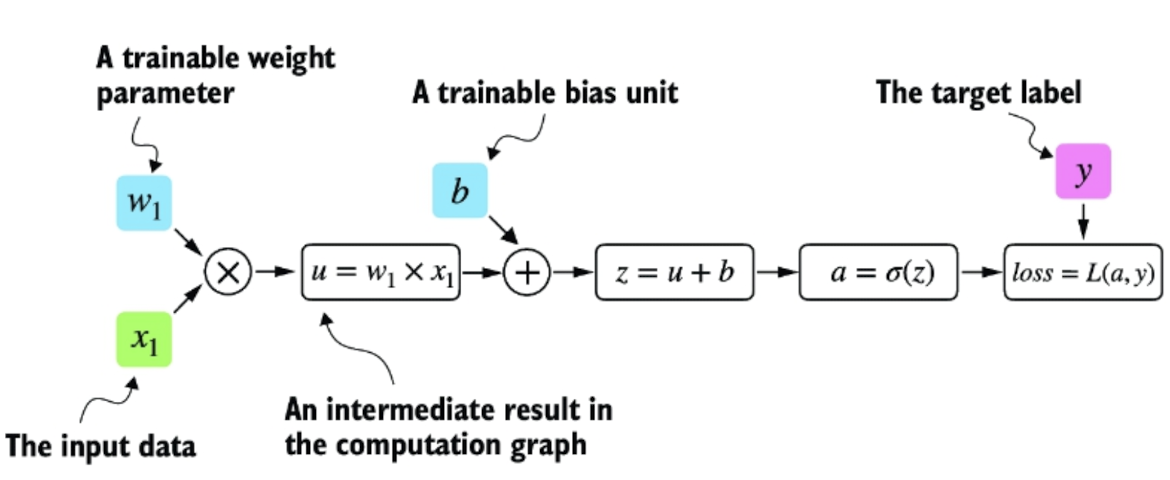

- In fact, PyTorch builds such a computation graph in the background, and we can use this to calculate gradients of a loss function with respect to the model parameters (here w1 and b) to train the model.

# 4. Automatic differentiation made easy

- If we carry out computations in PyTorch, it will build a computational graph internally by default if one of its terminal nodes has the requires_grad attribute set to True. This is useful if we want to compute gradients. Gradients are required when training neural networks via the popular backpropagation algorithm, which can be considered an implementation of the chain rule from calculus for neural networks.

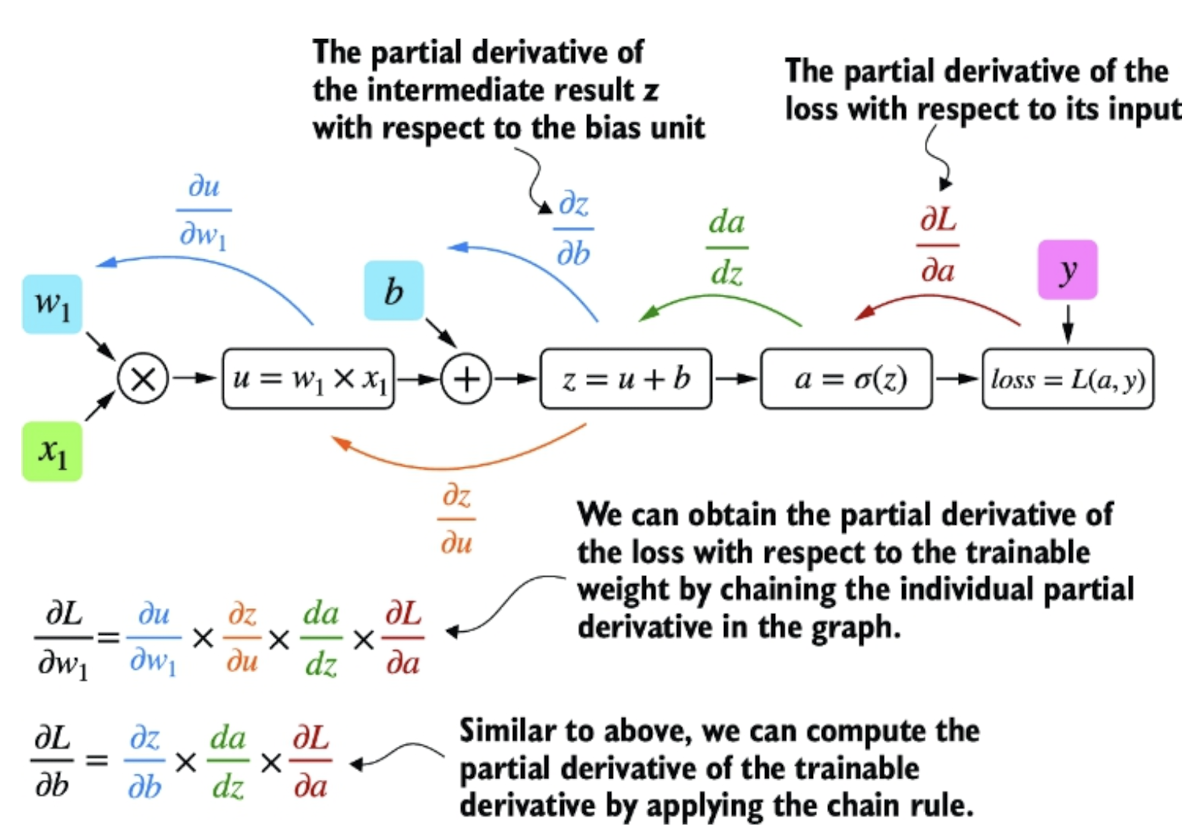

### Partial derivatives and gradients


---
- A gradient is a vector containing all of the partial derivatives of a multivariate function, a function with more than one variable as input.


In [12]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad = True)
b = torch.tensor([0.0], requires_grad = True)

z = x1 * w1 + b 
a = torch.sigmoid(z)
loss = F.binary_cross_entropy(a,y)
grad_L_w1 = grad(loss, w1, retain_graph = True) # By default, PyTorch destroys the computation graph after calculating the gradients to free memory. However, since we will reuse this computation graph shortly, we set retain_graph=True so that it stays in memory.
grad_L_b = grad(loss,b, retain_graph = True)

In [13]:
print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


Here, we have been using the grad function manually, which can be useful for experimentation, debugging, and demonstrating concepts. But, in practice, PyTorch provides even more high-level tools to automate this process. For instance, we can call ***.backward*** on the loss, and PyTorch will compute the gradients of all the leaf nodes in the graph, which will be stored via the tensors’ .grad attributes:

In [14]:
loss.backward()
print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


# 5. Implementing multilayer neural networks

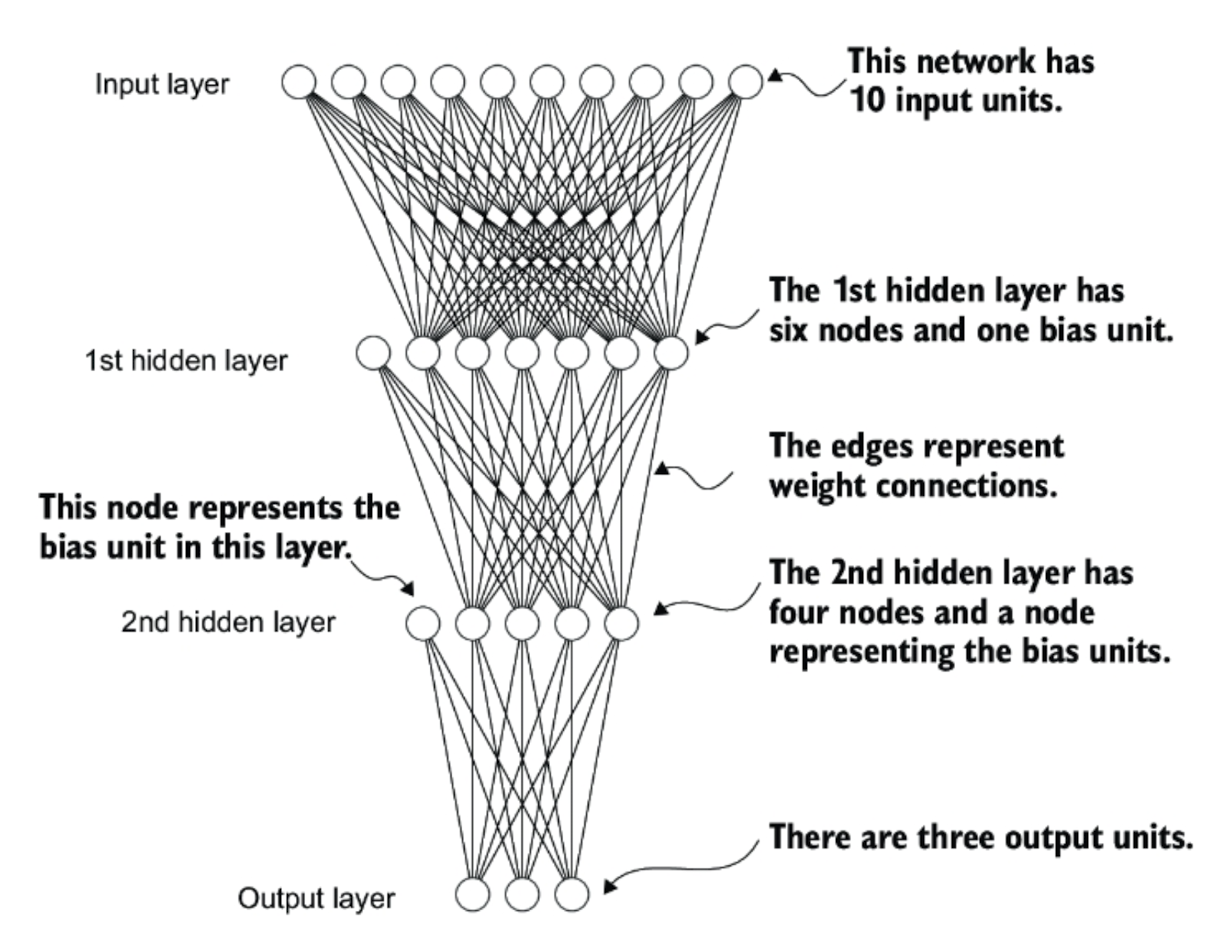

- When implementing a neural network in PyTorch, we can subclass the `torch.nn.Module` class to define our own custom network architecture. This Module base class provides a lot of functionality, making it easier to build and train models. For instance, it allows us to encapsulate layers and operations and keep track of the model’s parameters.


- Within this subclass, we define the network layers in the `__init__` constructor and specify how the layers interact in the forward method. The forward method describes how the input data passes through the network and comes together as a computation graph.

- In contrast, the backward method,which we typically do not need to implement ourselves, is used during training to compute gradients of the loss function given the model parameters.


In [71]:
import torch
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        ''' 1. Coding the number of inputs and outputs as variables
        allows us to reuse the same code for datasets with different 
        numbers of features and classes
        '''
        super().__init__()

        self.layers = torch.nn.Sequential(
            # first hidden layer
            torch.nn.Linear(num_inputs, 30), #2. The Linear layer takes the number of input and output nodes as arguments.
            torch.nn.ReLU(),              #3. Nonlinear activation functions are placed between the hidden layers.

            # second hidden layer
            torch.nn.Linear(30,20),   #4. The number of output nodes of one hidden layer has to match the number of inputs of the next layer.
            torch.nn.ReLU(),


            # the output layer
            torch.nn.Linear(20, num_outputs),

        )

    def forward (self, x):
        logits = self.layers(x)

        return logits  # 5. The outputs of the last layer are called logits.

In [72]:
# initiate the new neural network object
model = NeuralNetwork(50,3)

In [73]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


let’s check the total number of trainable parameters of this model:

In [74]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters", num_params) 

Total number of trainable model parameters 2213


- Each parameter for which `requires_grad=True` counts as a trainable parameter and will be updated during training. Here 0 index layer represent the first linear layer if we want to see the number of trainable parameters in this we can as follows:

In [75]:
print(model.layers[0].weight)

Parameter containing:
tensor([[ 0.0788,  0.1260,  0.0459,  ..., -0.0993, -0.0214,  0.0662],
        [-0.0226,  0.0933,  0.0721,  ...,  0.1082,  0.1036, -0.0626],
        [ 0.1354, -0.0795, -0.1310,  ...,  0.0725,  0.0040, -0.0690],
        ...,
        [ 0.0948,  0.1339,  0.0945,  ..., -0.0833, -0.0300, -0.0298],
        [-0.0787, -0.0077,  0.0994,  ..., -0.0107,  0.0232,  0.0411],
        [ 0.0332, -0.1330,  0.1354,  ..., -0.0395,  0.0402, -0.0003]],
       requires_grad=True)


In [76]:
print(model.layers[0].weight.shape)

torch.Size([30, 50])


In [77]:
## lets check bias
print(model.layers[0].bias)

Parameter containing:
tensor([-0.0105, -0.1127, -0.0698, -0.0746,  0.1202, -0.0049,  0.1232,  0.0946,
        -0.0935,  0.1021, -0.0486, -0.1232, -0.0281,  0.0497, -0.0635, -0.1221,
         0.0235, -0.0874, -0.0976, -0.1068, -0.0370, -0.0869, -0.1412,  0.1209,
         0.0065,  0.0401, -0.0717,  0.0340, -0.0848,  0.0977],
       requires_grad=True)


In [78]:
print(model.layers[0].bias.shape)

torch.Size([30])


--> The model weights are initialized with small random numbers, which differ each time we instantiate the network.
- For learning purpose, we want to keep using small random numbers as initial values for our layer weights, we can make the random number initialization reproducible by seeding PyTorch’s random number generator via `manual_seed`:

In [79]:
torch.manual_seed(123)
model = NeuralNetwork(50,3)
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


In [80]:
## Lets see the forward pass:

In [81]:
torch.manual_seed(123)
x = torch.rand(1,50) # (note that our network expects 50-dimensional feature vectors)
x

tensor([[0.2961, 0.5166, 0.2517, 0.6886, 0.0740, 0.8665, 0.1366, 0.1025, 0.1841,
         0.7264, 0.3153, 0.6871, 0.0756, 0.1966, 0.3164, 0.4017, 0.1186, 0.8274,
         0.3821, 0.6605, 0.8536, 0.5932, 0.6367, 0.9826, 0.2745, 0.6584, 0.2775,
         0.8573, 0.8993, 0.0390, 0.9268, 0.7388, 0.7179, 0.7058, 0.9156, 0.4340,
         0.0772, 0.3565, 0.1479, 0.5331, 0.4066, 0.2318, 0.4545, 0.9737, 0.4606,
         0.5159, 0.4220, 0.5786, 0.9455, 0.8057]])

In [82]:
x.shape

torch.Size([1, 50])

In [83]:
out = model(x)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


The forward pass refers to calculating output tensors from input tensors. This involves passing the input data through all the neural network layers, starting from the input layer, through hidden layers, and finally to the output layer.


- Notice that the output tensor also includes a grad_fn value.
- Here, `grad_fn=<AddmmBackward0>` represents the last-used function to compute a variable in the computational graph. In particular, grad_fn=<AddmmBackward0> means that the tensor we are inspecting was created via a matrix multiplication and addition operation. PyTorch will use this information when it computes gradients during backpropagation. The `<AddmmBackward0>` part of `grad_fn=<AddmmBackward0>` specifies the operation performed. In this case, it is an Addmm operation. Addmm stands for `matrix multiplication (mm)` followed by an `addition (Add)`.
- So, when we use a model for inference (for instance, making predictions) rather than training, the best practice is to use the torch.no_grad() context manager. This tells PyTorch that it doesn’t need to keep track of the gradients, which can result in significant savings in memory and computation:


In [84]:
with torch.no_grad():
    out = model(x)

print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


In PyTorch, it’s common practice to code models such that they return the outputs of the last layer (logits) without passing them to a nonlinear activation function. That’s because PyTorch’s commonly used loss functions combine the softmax (or sigmoid for binary classification) operation with the negative log-likelihood loss in a single class. The reason for this is numerical efficiency and stability. So, if we want to compute class-membership probabilities for our predictions, we have to call the softmax function explicitly:

In [85]:
with torch.no_grad():
    out = torch.softmax(model(x), dim=1)
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


The values can now be interpreted as class-membership probabilities that sum up to 1. The values are roughly equal for this random input, which is expected for a randomly initialized model without training.

# 6. Setting up efficient data loaders

Before we can train our model, we have to briefly discuss creating efficient data loaders in PyTorch, which we will iterate over during training. The overall idea behind data loading in PyTorch is illustrated in figure:
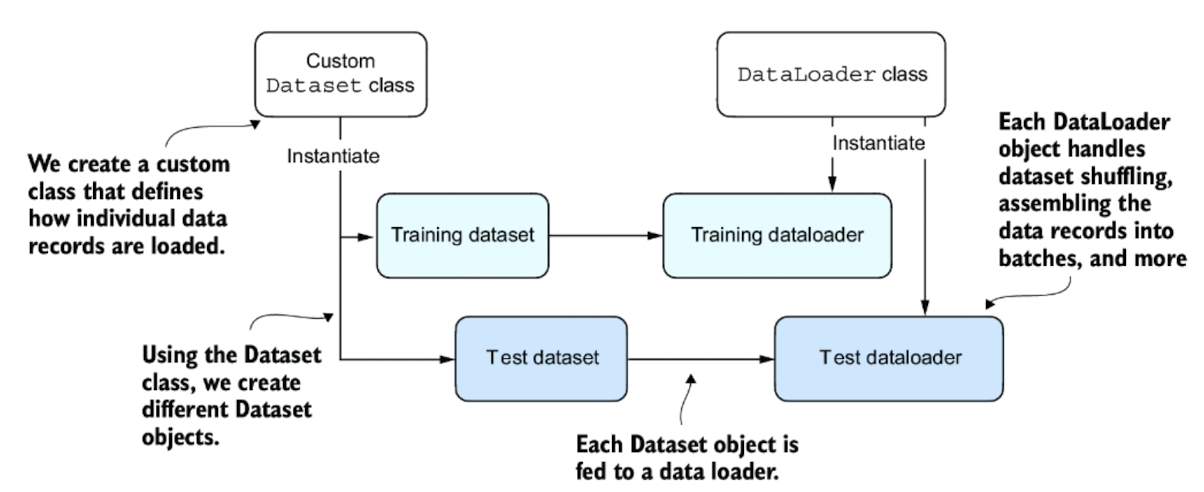

- PyTorch implements a `Dataset` and a `DataLoader` class.
- The `Dataset` class is used to instantiate objects that define how each data record is loaded.
- The `DataLoader` handles how the data is shuffled and assembled into batches.


In [86]:
## creating a small toy dataset 
# input : 2 features
# output : 0,1
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

y_train = torch.tensor([0,0,0,1,1])

X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])
y_test = torch.tensor([0, 1])

***NOTE***  PyTorch requires that class labels start with label 0, and the largest class label value should not exceed the number of output nodes minus 1 (since Python index counting starts at zero). So, if we have class labels 0, 1, 2, 3, and 4, the neural network output layer should consist of five nodes.



- Next, we create a custom dataset class, `ToyDataset`, by subclassing from PyTorch’s Dataset parent class,


In [87]:
# Defining the custom dataset class
from torch.utils.data import Dataset
class ToyDataset(Dataset):
    def __init__(self,X,y):
        self.features = X
        self.labels = y

    def __getitem__(self,index): #1. Instructions for retrieving exactly one data record and the corresponding label

        one_x = self.features[index] # 1.
        one_y = self.labels[index] # 1.
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0] #2 Instructions for returning the total length of the dataset

train_ids = ToyDataset(X_train, y_train)
test_ids = ToyDataset(X_test, y_test)

- The purpose of this custom `ToyDataset` class is to instantiate a PyTorch `DataLoader`. But before we get to this step, let’s briefly go over the general structure of the ToyDataset code.
- In PyTorch, the three main components of a custom Dataset class are:
1. `__init__` **Constructor** : we set up attributes that **we can access later** in the `__getitem__` and `__len__` methods. These could be file paths, file objects, database connectors, and so on. Since we created a tensor dataset that sits in memory, we simply assign *X* and *y* to these attributes, which are placeholders for our tensor objects.
2. `__getitem__` method: In the `__getitem__` method, we define instructions for returning **exactly one item from the dataset via an index**. This refers to the features and the class label corresponding to a single training example or test instance. (The data loader will provide this index)
3. `__len__` method: Finally, the `__len__` method contains instructions for retrieving the **length of the dataset**. Here, we use the .shape attribute of a tensor to return the number of rows in the feature array. In the case of the training dataset, we have five rows, which we can double-check:

In [88]:
print(len(train_ids))

5


In [89]:
print(train_ids)

Now that we’ve defined a PyTorch Dataset class we can use for our toy dataset, we can use PyTorch’s DataLoader class to sample from it, as shown in the following listing.


In [90]:
# Initiating the dataloader


In [91]:
from torch.utils.data import DataLoader
torch.manual_seed(123)
# train DataLoader
train_loader = DataLoader(
    dataset = train_ids, # 1. The ToyDataset instance created earlier serves as input to the data loader.
    batch_size = 2,
    shuffle = True, # 2. Whether or not to shuffle the data
    num_workers=0 # 3. The number of background processes
)
# Test DataLoader
test_loader = DataLoader(
    dataset= test_ids,
    batch_size=2,
    shuffle= False, #4. It is not necessary to shuffle a test dataset.
    num_workers=0
)

In [92]:
for idx, (x,y) in enumerate(train_loader):
    print(f"Batch {idx+1} :", x, y)

Batch 1 : tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2 : tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3 : tensor([[ 2.7000, -1.5000]]) tensor([1])


As we can see based on the preceding output, the `train_loader` iterates over the training dataset, `visiting each training example exactly once`. This is known as a ***training epoch***.
- Since we seeded the random number generator using `torch.manual_seed(123)` here, you should get the exact same shuffling order of training examples. However, if you iterate over the dataset a *second time*, you will see that the *shuffling order will change*. This is desired to prevent deep neural networks from *getting caught in repetitive update cycles during training*.


 ***NOTE*** : We specified a batch size of 2 here, but the third batch only contains a single example. That’s because we have five training examples, and 5 is not evenly divisible by 2. In practice, having a substantially smaller batch as the last batch in a training epoch can disturb the convergence during training. To prevent this, set `drop_last=True`, which will drop the last batch in each epoch, as shown in the following listing.


In [93]:
## Training loader that drop last batch:
train_loader = DataLoader(
    dataset = train_ids, # 1. The ToyDataset instance created earlier serves as input to the data loader.
    batch_size = 2,
    shuffle = True, # 2. Whether or not to shuffle the data
    num_workers=0, # 3. The number of background processes
    drop_last = True
)

In [94]:
for idx, (x,y) in enumerate(train_loader):
    print(f"Batch {idx+1} :", x, y)

Batch 1 : tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 2 : tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])


***Important Note***
- `num_workers=0` in the DataLoader. This parameter in PyTorch’s DataLoader function is crucial for parallelizing data loading and preprocessing. When num_workers is set to 0, the data loading will be done in the main process and not in separate worker processes. This might seem unproblematic, but it can lead to significant slowdowns during model training when we train larger networks on a GPU. Instead of focusing solely on the processing of the deep learning model, the CPU must also take time to load and preprocess the data. As a result, the GPU can sit idle while waiting for the CPU to finish these tasks. In contrast, when num_workers is set to a number greater than 0, multiple worker processes are launched to load data in parallel, freeing the main process to focus on training your model and better utilizing your system’s resources
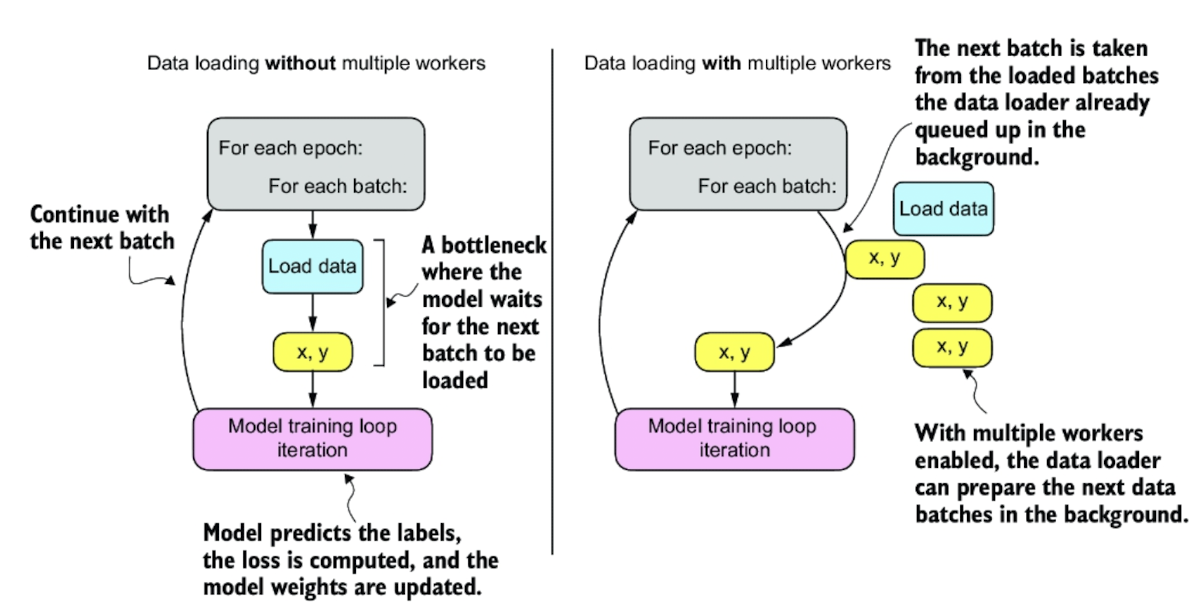

- Loading data without multiple workers (setting num_workers=0) will create a data loading bottleneck where the model sits idle until the next batch is loaded (left). If multiple workers are enabled, the data loader can queue up the next batch in the background (right).

- However, if we are working with very small datasets, setting num_workers to 1 or larger may not be necessary since the total training time takes only fractions of a second anyway. So, if you are working with tiny datasets or interactive environments such as Jupyter notebooks, increasing num_workers may not provide any noticeable speedup. It may, in fact, lead to some problems. One potential problem is the overhead of spinning up multiple worker processes, which could take longer than the actual data loading when your dataset is small.

- Furthermore, for Jupyter notebooks, setting num_workers to greater than 0 can sometimes lead to problems related to the sharing of resources between different processes, resulting in errors or notebook crashes. Therefore, it’s essential to understand the tradeoff and make a calculated decision on setting the num_workers parameter. When used correctly, it can be a beneficial tool but should be adapted to your specific dataset size and computational environment for optimal results.

- In my experience, setting `num_workers=4` usually leads to optimal performance on many real-world datasets, but optimal settings depend on your hardware and the code used for loading a training example defined in the Dataset class.


# 7 A typical training loop

In [99]:
# A.9 A neural Network training in Pytorch
import torch.nn.functional as F
torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2) # 1. The dataset has two features and two classes.
optimizer = torch.optim.SGD(
    model.parameters(), lr=0.5
    # 2. The optimizer needs to know which parameters to optimize.
)
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (features,labels) in enumerate(train_loader):
        logits = model(features)
        loss = F.cross_entropy(logits,labels)
        optimizer.zero_grad()  # 3. Sets the gradients from the previous round to 0 to prevent unintended gradient accumulation
        loss.backward() # 4. Computes the gradients of the loss given the model parameters
        optimizer.step() # 5. The optimizer uses the gradients to update the model parameters.

        ### Logging
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch : {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train loss : {loss:.2f}")

    model.eval()
        # # Insert optional model evaluation code


Epoch: 001/003 | Batch : 000/002 | Train loss : 0.75
Epoch: 001/003 | Batch : 001/002 | Train loss : 0.65
Epoch: 002/003 | Batch : 000/002 | Train loss : 0.44
Epoch: 002/003 | Batch : 001/002 | Train loss : 0.13
Epoch: 003/003 | Batch : 000/002 | Train loss : 0.03
Epoch: 003/003 | Batch : 001/002 | Train loss : 0.00


NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=2, bias=True)
  )
)

- As we can see, the loss reaches 0 after three epochs, a sign that the model converged on the training set. Here, we initialize a model with two inputs and two outputs because our toy dataset has two input features and two class labels to predict.
- We used a stochastic gradient descent (SGD) optimizer with a learning rate (lr) of 0.5. The learning rate is a hyperparameter, meaning it’s a tunable setting that we must experiment with based on observing the loss. Ideally, we want to choose a learning rate such that the loss converges after a certain number of epochs—the number of epochs is another hyperparameter to choose.

***Q: How many parameters does the neural network introduced in listing A.9 have?***



In [68]:
# model1 = NeuralNetwork(2,2)
# print(model1)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=2, bias=True)
  )
)


In [69]:
# num_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
# print("Total number of trainable model parameters", num_params) 

Total number of trainable model parameters 752


In practice, we often use a third dataset, a so-called `validation dataset`, to find the optimal hyperparameter settings. A validation dataset is similar to a test set. However, while we only want to use a test set precisely once to avoid biasing the evaluation, we usually use the validation set multiple times to tweak the model settings.



- We also introduced new settings called `model.train()` and `model.eval()`. As these names imply, these settings are used to put the model into a training and an evaluation mode. This is necessary for components that behave differently during training and inference, such as *dropout* or *batch normalization* layers. Since we don’t have dropout or other components in our NeuralNetwork class that are affected by these settings, using model.train() and model.eval() is redundant in our preceding code. However, it’s best practice to include them anyway to avoid unexpected behaviors when we change the model architecture or reuse the code to train a different model.
- As discussed earlier, we pass the logits directly into the cross_entropy loss function, which will apply the softmax function internally for efficiency and numerical stability reasons. Then, calling `loss.backward()` will calculate the gradients in the computation graph that PyTorch constructed in the background.<br/>
***Important Note for Optimizer***
- The `optimizer.step()` method will use the ***gradients to update the model parameters*** to ***minimize the loss***. In the case of the `SGD optimizer`, this means *multiplying the gradients with the learning rate* and *adding the scaled negative gradient to the parameters*.
- To prevent undesired gradient accumulation, it is important to include an `optimizer.zero_grad()` call in each update round to reset the gradients to 0. Otherwise, the gradients will accumulate, which may be undesired.
  
*After we have trained the model, we can use it to make predictions:*


In [100]:
model.eval()
# when we use a model for inference (for instance, making predictions) rather than training, the best practice is to use the torch.no_grad() context manager. 
# This tells PyTorch that it doesn’t need to keep track of the gradients
with torch.no_grad():
    output = model(X_train)

print(output)
    

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])


- To obtain the class membership probabilities, we can then use PyTorch’s softmax function:

In [101]:
torch.set_printoptions(sci_mode=False)
probas =torch.softmax(output, dim=1)
print(probas)

tensor([[    0.9991,     0.0009],
        [    0.9982,     0.0018],
        [    0.9949,     0.0051],
        [    0.0491,     0.9509],
        [    0.0307,     0.9693]])


- Let’s consider the first row in the preceding code output. Here, the first value (column) means that the training example has a 99.91% probability of belonging to class 0 and a 0.09% probability of belonging to class 1. (The set_printoptions call is used here to make the outputs more legible.)
- We can convert these values into class label predictions using PyTorch’s argmax function, which returns the index position of the highest value in each row if we set dim=1 (setting dim=0 would return the highest value in each column instead):

In [102]:
predictions = torch.argmax(probas, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


Note that it is unnecessary to compute softmax probabilities to obtain the class labels. We could also apply the argmax function to the logits (outputs) directly:

In [103]:
pridictions = torch.argmax(output,dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


-Here, we computed the predicted labels for the training dataset. Since the training dataset is relatively small, we could compare it to the true training labels by eye and see that the model is 100% correct. We can double-check this using the `==` comparison operator:

In [104]:
pridictions == y_train

tensor([True, True, True, True, True])

In [105]:
# Using torch.sum, we can count the number of correct predictions:
torch.sum(pridictions==y_train)

tensor(5)

- Since the dataset consists of five training examples, we have five out of five predictions that are correct, which has 5/5 × 100% = 100% prediction accuracy.
- To generalize the computation of the prediction accuracy, let’s implement a compute_accuracy function:

In [108]:
def compute_accuracy(model, dataloader):

    model = model.eval()
    correct = 0.0
    total_examples = 0
    
    for idx, (features, labels) in enumerate(dataloader):
        
        with torch.no_grad():
            logits = model(features)
        
        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return (correct / total_examples).item()

The code iterates over a data loader to compute the number and fraction of the correct predictions. When we work with large datasets, we typically can only call the model on a small part of the dataset due to memory limitations. The `compute_accuracy` function here is a general method that scales to datasets of arbitrary size since, in each iteration, the dataset chunk that the model receives is the same size as the batch size seen during training. The internals of the compute_accuracy function are similar to what we used before when we converted the logits to the class labels.


In [109]:
compute_accuracy(model, train_loader)

1.0

In [110]:
compute_accuracy(model, test_loader)

1.0

# 8. Saving and Loading models

In [111]:
!pwd

/Users/pyarelal/Desktop/PhD/Routine/LLMs/Sebastian/LLMs-from-scratch-main/ch02/Pyare-ch02


In [112]:
# recommended way to save the model :
torch.save(model.state_dict(),"model.pth")

- The model’s state_dict is a Python dictionary object that maps each layer in the model to its trainable parameters (weights and biases).
- "model.pth" is an arbitrary filename for the model file saved to disk. We can give it any name and file ending we like; however, .pth and .pt are the most common conventions.
- Once we saved the model, we can restore it from disk:

In [113]:
model = NeuralNetwork(2,2)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

- The `torch.load("model.pth")` function reads the file `"model.pth"` and reconstructs the Python dictionary object containing the model’s parameters while `model.load_state_dict()` applies these parameters to the model, effectively restoring its learned state from when we saved it.
- The line `model = NeuralNetwork(2, 2)` is not strictly necessary if you execute this code in the same session where you saved a model. However, I included it here to illustrate that ***we need an instance of the model in memory to apply the saved parameters***. **Here, the `NeuralNetwork(2, 2)` architecture needs to match the original saved model exactly.**

# 9. Optimizing training performance with GPUs

## 9.1 PyTorch computations on GPU devices

- In PyTorch, a device is where computations occur and data resides. The CPU and the GPU are examples of devices.
- A PyTorch tensor resides in a device, and its operations are executed on the same device.
- Check pytorch is utilizing the GPU

In [114]:
print(torch.cuda.is_available())

False


- Now, suppose we have two tensors that we can add; this computation will be carried out on the CPU by default:

In [115]:
print(torch.backends.mps.is_available()) # Yes M1 support the pytorch accelerated computations

True


In [116]:
tensor_1 = torch.tensor([1., 2., 3.])
tensor_2 = torch.tensor([4., 5., 6.])
print(tensor_1 + tensor_2)

tensor([5., 7., 9.])


- We can now use the .to() method. This method is the same as the one we use to change a tensor’s datatype (see 2.2.2) to transfer these tensors onto a GPU and perform the addition there:

In [117]:
# For cuda (Compute Unified Device Architecture ) NVIDIA
tensor_1 = tensor_1.to("cuda")
tensor_2 = tensor_2.to("cuda")
print(tensor_1 + tensor_2)

AssertionError: Torch not compiled with CUDA enabled

In [119]:
# For mps (Metal Performance Shaders) - Apple
tensor_1 = tensor_1.to("mps")
tensor_2 = tensor_2.to("mps")
print(tensor_1 + tensor_2)

tensor([5., 7., 9.], device='mps:0')


- The resulting tensor now includes the device information, device='cuda:0', which means that the tensors reside on the first GPU.
-  If your machine hosts `multiple GPUs`, you can specify which GPU you’d like to transfer the tensors to. You do so by indicating the device ID in the transfer command. For instance, you can use `.to("cuda:0")`, `.to("cuda:1")`, and so on.
-  However, all tensors must be on the same device. Otherwise, the computation will fail, where one tensor resides on the CPU and the other on the GPU:


In [120]:
tensor_1 = tensor_1.to("cpu")
print(tensor_1 + tensor_2)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

- In sum, we only need to transfer the tensors onto the same GPU device, and PyTorch will handle the rest.

## 9.2 Single-GPU training

- Now that we are familiar with transferring tensors to the GPU, we can modify the training loop to run on a GPU. This step requires only changing three lines of code, as shown in the following listing.

In [121]:
# For Cuda
import torch.nn.functional as F
torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2) 

device = torch.device("cuda") #1. Defines a device variable that defaults to a GPU

model = model.to(device) #2. Transfers the model onto the GPU

optimizer = torch.optim.SGD(
    model.parameters(), lr=0.5
    
)
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (features,labels) in enumerate(train_loader):
        
        features, labels = features.to(device), labels.to(device) #3. Transfers the data onto the GPU
        
        logits = model(features)
        loss = F.cross_entropy(logits,labels)
        optimizer.zero_grad()  
        loss.backward() 
        optimizer.step() 

        ### Logging
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch : {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train loss : {loss:.2f}")

    model.eval()
        # # Insert optional model evaluation code


AssertionError: Torch not compiled with CUDA enabled

In [124]:
# For MPS
import torch.nn.functional as F
torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2) 

device = torch.device("mps") #1. Defines a device variable that defaults to a GPU

model = model.to(device) #2. Transfers the model onto the GPU

optimizer = torch.optim.SGD(
    model.parameters(), lr=0.5
    
)
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (features,labels) in enumerate(train_loader):
        
        features, labels = features.to(device), labels.to(device) #3. Transfers the data onto the GPU
        
        logits = model(features)
        loss = F.cross_entropy(logits,labels)
        optimizer.zero_grad()  
        loss.backward() 
        optimizer.step() 

        ### Logging
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch : {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train loss : {loss:.2f}")

    model.eval()
        # # Insert optional model evaluation code


Epoch: 001/003 | Batch : 000/002 | Train loss : 0.75
Epoch: 001/003 | Batch : 001/002 | Train loss : 0.65
Epoch: 002/003 | Batch : 000/002 | Train loss : 0.44
Epoch: 002/003 | Batch : 001/002 | Train loss : 0.13
Epoch: 003/003 | Batch : 000/002 | Train loss : 0.03
Epoch: 003/003 | Batch : 001/002 | Train loss : 0.00


- We can use `.to("cuda")` instead of `device = torch.device("cuda")`. Transferring a tensor to `"cuda"` instead of `torch.device("cuda")` works as well and is shorter.
- We can also modify the statement, which will make the same code executable on a CPU if a GPU is not available. This is considered best practice when sharing PyTorch code:

In [126]:
# For Cuda
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# for mps
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

---

**Exercise Question:  Compare the run time of matrix multiplication on a CPU to a GPU. At what matrix size do you begin to see the matrix multiplication on the GPU being faster than on the CPU? Hint: use the %timeit command in Jupyter to compare the run time. For example, given matrices a and b, run the command %timeit a @ b in a new notebook cell.**


In [127]:
import torch
a = torch.rand(100,200)
b = torch.rand(200,300)

In [128]:
%timeit a @ b

15 μs ± 56.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [130]:
a,b = a.to("mps"), b.to("mps")

In [131]:
%timeit a @ b

24.6 μs ± 99.4 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


---

## 9.3 Training with multiple GPUs

- Distributed training is the concept of dividing the model training across multiple GPUs and machines.
**Why do we need this?**
-  Even when it is possible to train a model on a single GPU or machine, the process could be exceedingly time-consuming.
-  The training time can be significantly reduced by distributing the training process across multiple machines, each with potentially multiple GPUs.
-   This is particularly crucial in the **experimental stages** of model development, ***where numerous training iterations might be necessary to fine-tune the model parameters and architecture***.



Let’s begin with the most basic case of distributed training: PyTorch’s `DistributedDataParallel (DDP)` strategy. `DDP` enables parallelism by **splitting the input data across the available devices** and **processing these data subsets simultaneously**

**How does this work?**
- PyTorch launches a separate process on each GPU, and each process receives and keeps a copy of the model; these copies will be synchronized during training. To illustrate this, suppose we have two GPUs that we want to use to train a neural network:
  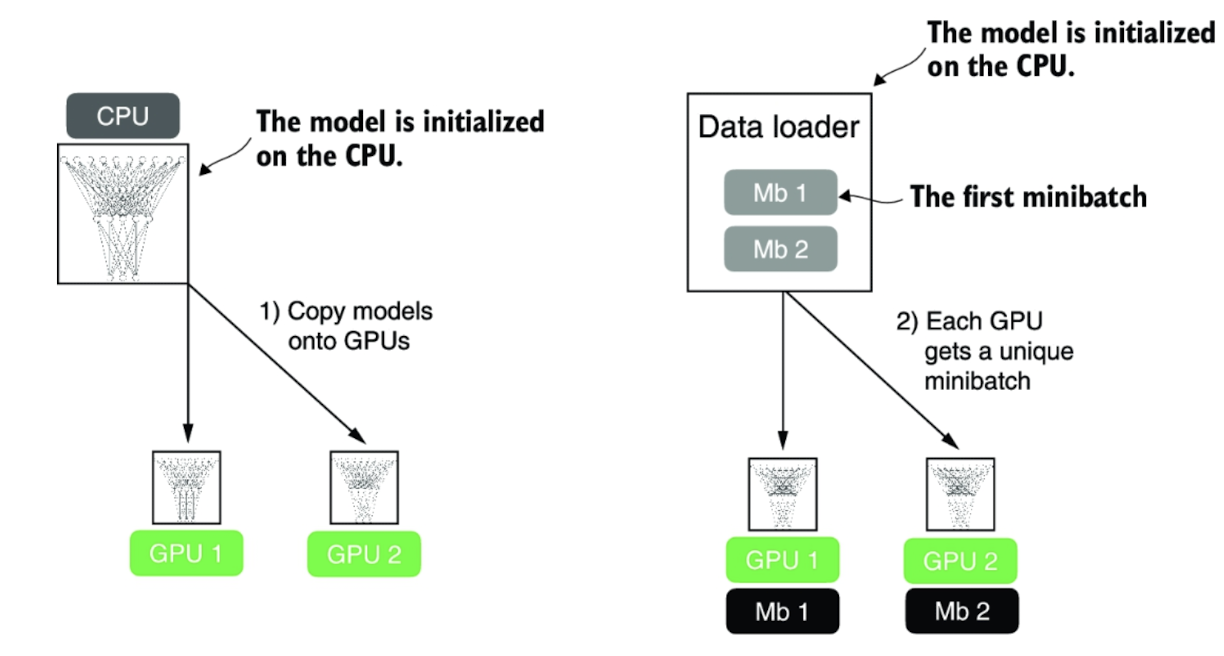

- The model and data transfer in DDP involves two key steps.

    - First, we create a copy of the model on each of the GPUs.
    - Then we divide the input data into unique minibatches that we pass on to each model copy.

- Each of the two GPUs will receive a copy of the model. Then, in every training iteration, each model will receive a minibatch (or just “batch”) from the data loader.

- We can use a `DistributedSampler` to ensure that each GPU will receive a different, *non-overlapping batch* when using DDP.

- Since each model copy will see a different sample of the training data, the model copies will return different logits as outputs and compute different gradients during the backward pass.

- These gradients are then **averaged and synchronized during training to update the models**. This way, we ensure that the models don’t diverge.

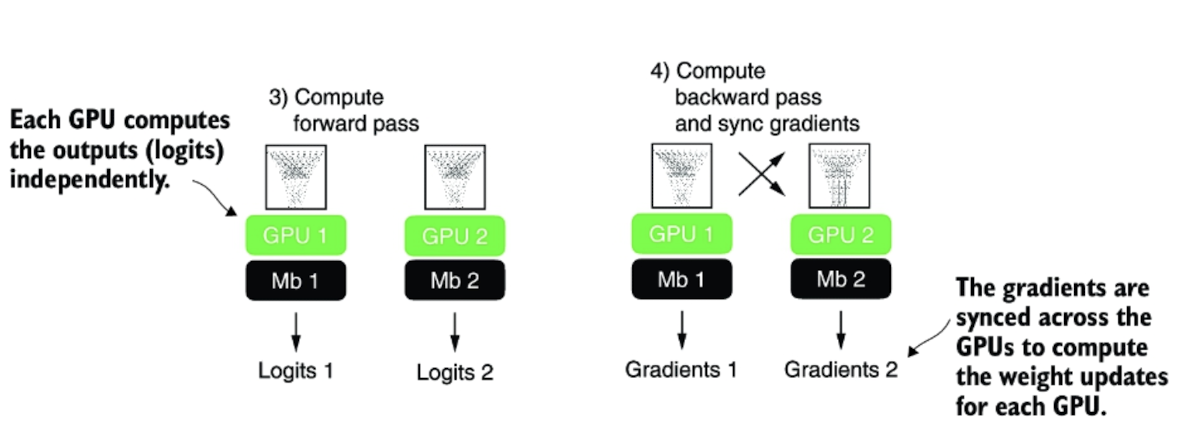

- The forward and backward passes in DDP are executed independently on each GPU with its corresponding data subset. Once the forward and backward passes are completed, gradients from each model replica (on each GPU) are synchronized across all GPUs. This ensures that every model replica has the same updated weights.

- The benefit of using DDP is the enhanced speed it offers for processing the dataset compared to a single GPU. Barring a minor communication overhead between devices that comes with DDP use, it can theoretically process a training epoch in half the time with two GPUs compared to just one. The time efficiency scales up with the number of GPUs, allowing us to process an epoch eight times faster if we have eight GPUs, and so on.

**NOTE** <br/>
DDP does not function properly within interactive Python environments like Jupyter notebooks, which don’t handle multiprocessing in the same way a standalone Python script does. Therefore, the following code should be executed as a script, not within a notebook interface like Jupyter. DDP needs to spawn multiple processes, and each process should have its own Python interpreter instance.


First, we import a few additional submodules, classes, and functions for distributed training PyTorch:



-- Next code in Python script files -- 
Follow now : `DistributedDataParallel_DDP_script.py` and notes from notion